In [1]:
import re
import datetime as dt
import numpy as np

import matplotlib.patheffects as path_effects
effects=[path_effects.Stroke(linewidth=3, foreground='w'),path_effects.Stroke(linewidth=1, foreground='k')]
# ax.text(path_effects=effects)

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib import gridspec
# import matplotlib.patheffects as path_effects
# from IPython.display import HTML

## set default matplotlib font and font size
typeface='serif'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

import imp
bt = imp.load_source('baltic', '/Users/bpotter/Tools/baltic/baltic.py')


def index(data,item):
    """ Get the indices of an item in a list. """
    return [i for i,x in enumerate(data) if x == item]

def column(data,col):
    """ Get column of a list of lists. """
    return [row [col] for row in data]

def unique(o, idfun=repr):
    """Reduce a list down to its unique elements."""
    seen = {}
    return [seen.setdefault(idfun(e),e) for e in o if idfun(e) not in seen]

def decimalDate(date,fmt="%Y-%m-%d"):
    """ Converts calendar dates in specified format to decimal date. """
    adatetime=dt.datetime.strptime(date,fmt)
    year = adatetime.year
    boy = dt.datetime(year, 1, 1)
    eoy = dt.datetime(year + 1, 1, 1)
    return year + ((adatetime - boy).total_seconds() / ((eoy - boy).total_seconds()))


In [2]:
trees={}
tmrcas={}
for seg in ['pb1','pb2','pa','ha','np','na','mp']:
    trees[seg]=bt.tree()
    tr=bt.loadJSON('/Users/bpotter/Desktop/tree_jsons/flu_seasonal_h3n2_%s_2y_tree.json'%(seg),json_translation={'name': 'strain', 'height': 'tvalue','absoluteTime':'num_date'},stats=True) 
    
    trees[seg]=tr
    tmrcas[seg]=tr.allTMRCAs()


Tree height: 5.217670
Tree length: 372.775980
annotations present

Numbers of objects in tree: 2209 (953 nodes and 1256 leaves)


Tree height: 6.542400
Tree length: 406.271960
annotations present

Numbers of objects in tree: 2197 (916 nodes and 1281 leaves)


Tree height: 6.423800
Tree length: 380.239570
annotations present

Numbers of objects in tree: 2169 (924 nodes and 1245 leaves)


Tree height: 7.163170
Tree length: 492.513560
annotations present

Numbers of objects in tree: 3627 (1594 nodes and 2033 leaves)


Tree height: 6.201390
Tree length: 373.771110
annotations present

Numbers of objects in tree: 2326 (1012 nodes and 1314 leaves)


Tree height: 6.561270
Tree length: 494.802560
annotations present

Numbers of objects in tree: 3365 (1447 nodes and 1918 leaves)


Tree height: 7.003860
Tree length: 600.482050
annotations present

Numbers of objects in tree: 2774 (1178 nodes and 1596 leaves)



       pb1       pb1       922
       pb1       pb2      2404
       pb1        pa      2414
       pb1        ha      2758
       pb1        np      2989
       pb1        na      2858
       pb1        mp      3249
       pb2       pb2       887
       pb2        pa      2325
       pb2        ha      2563
       pb2        np      2717
       pb2        na      2642
       pb2        mp      3261
        pa        pa       892
        pa        ha      2750
        pa        np      2759
        pa        na      2655
        pa        mp      3193
        ha        ha      1481
        ha        np      3250
        ha        na      4683
        ha        mp      4572
        np        np       946
        np        na      3044
        np        mp      3595
        na        na      1317
        na        mp      4401
        mp        mp      1025


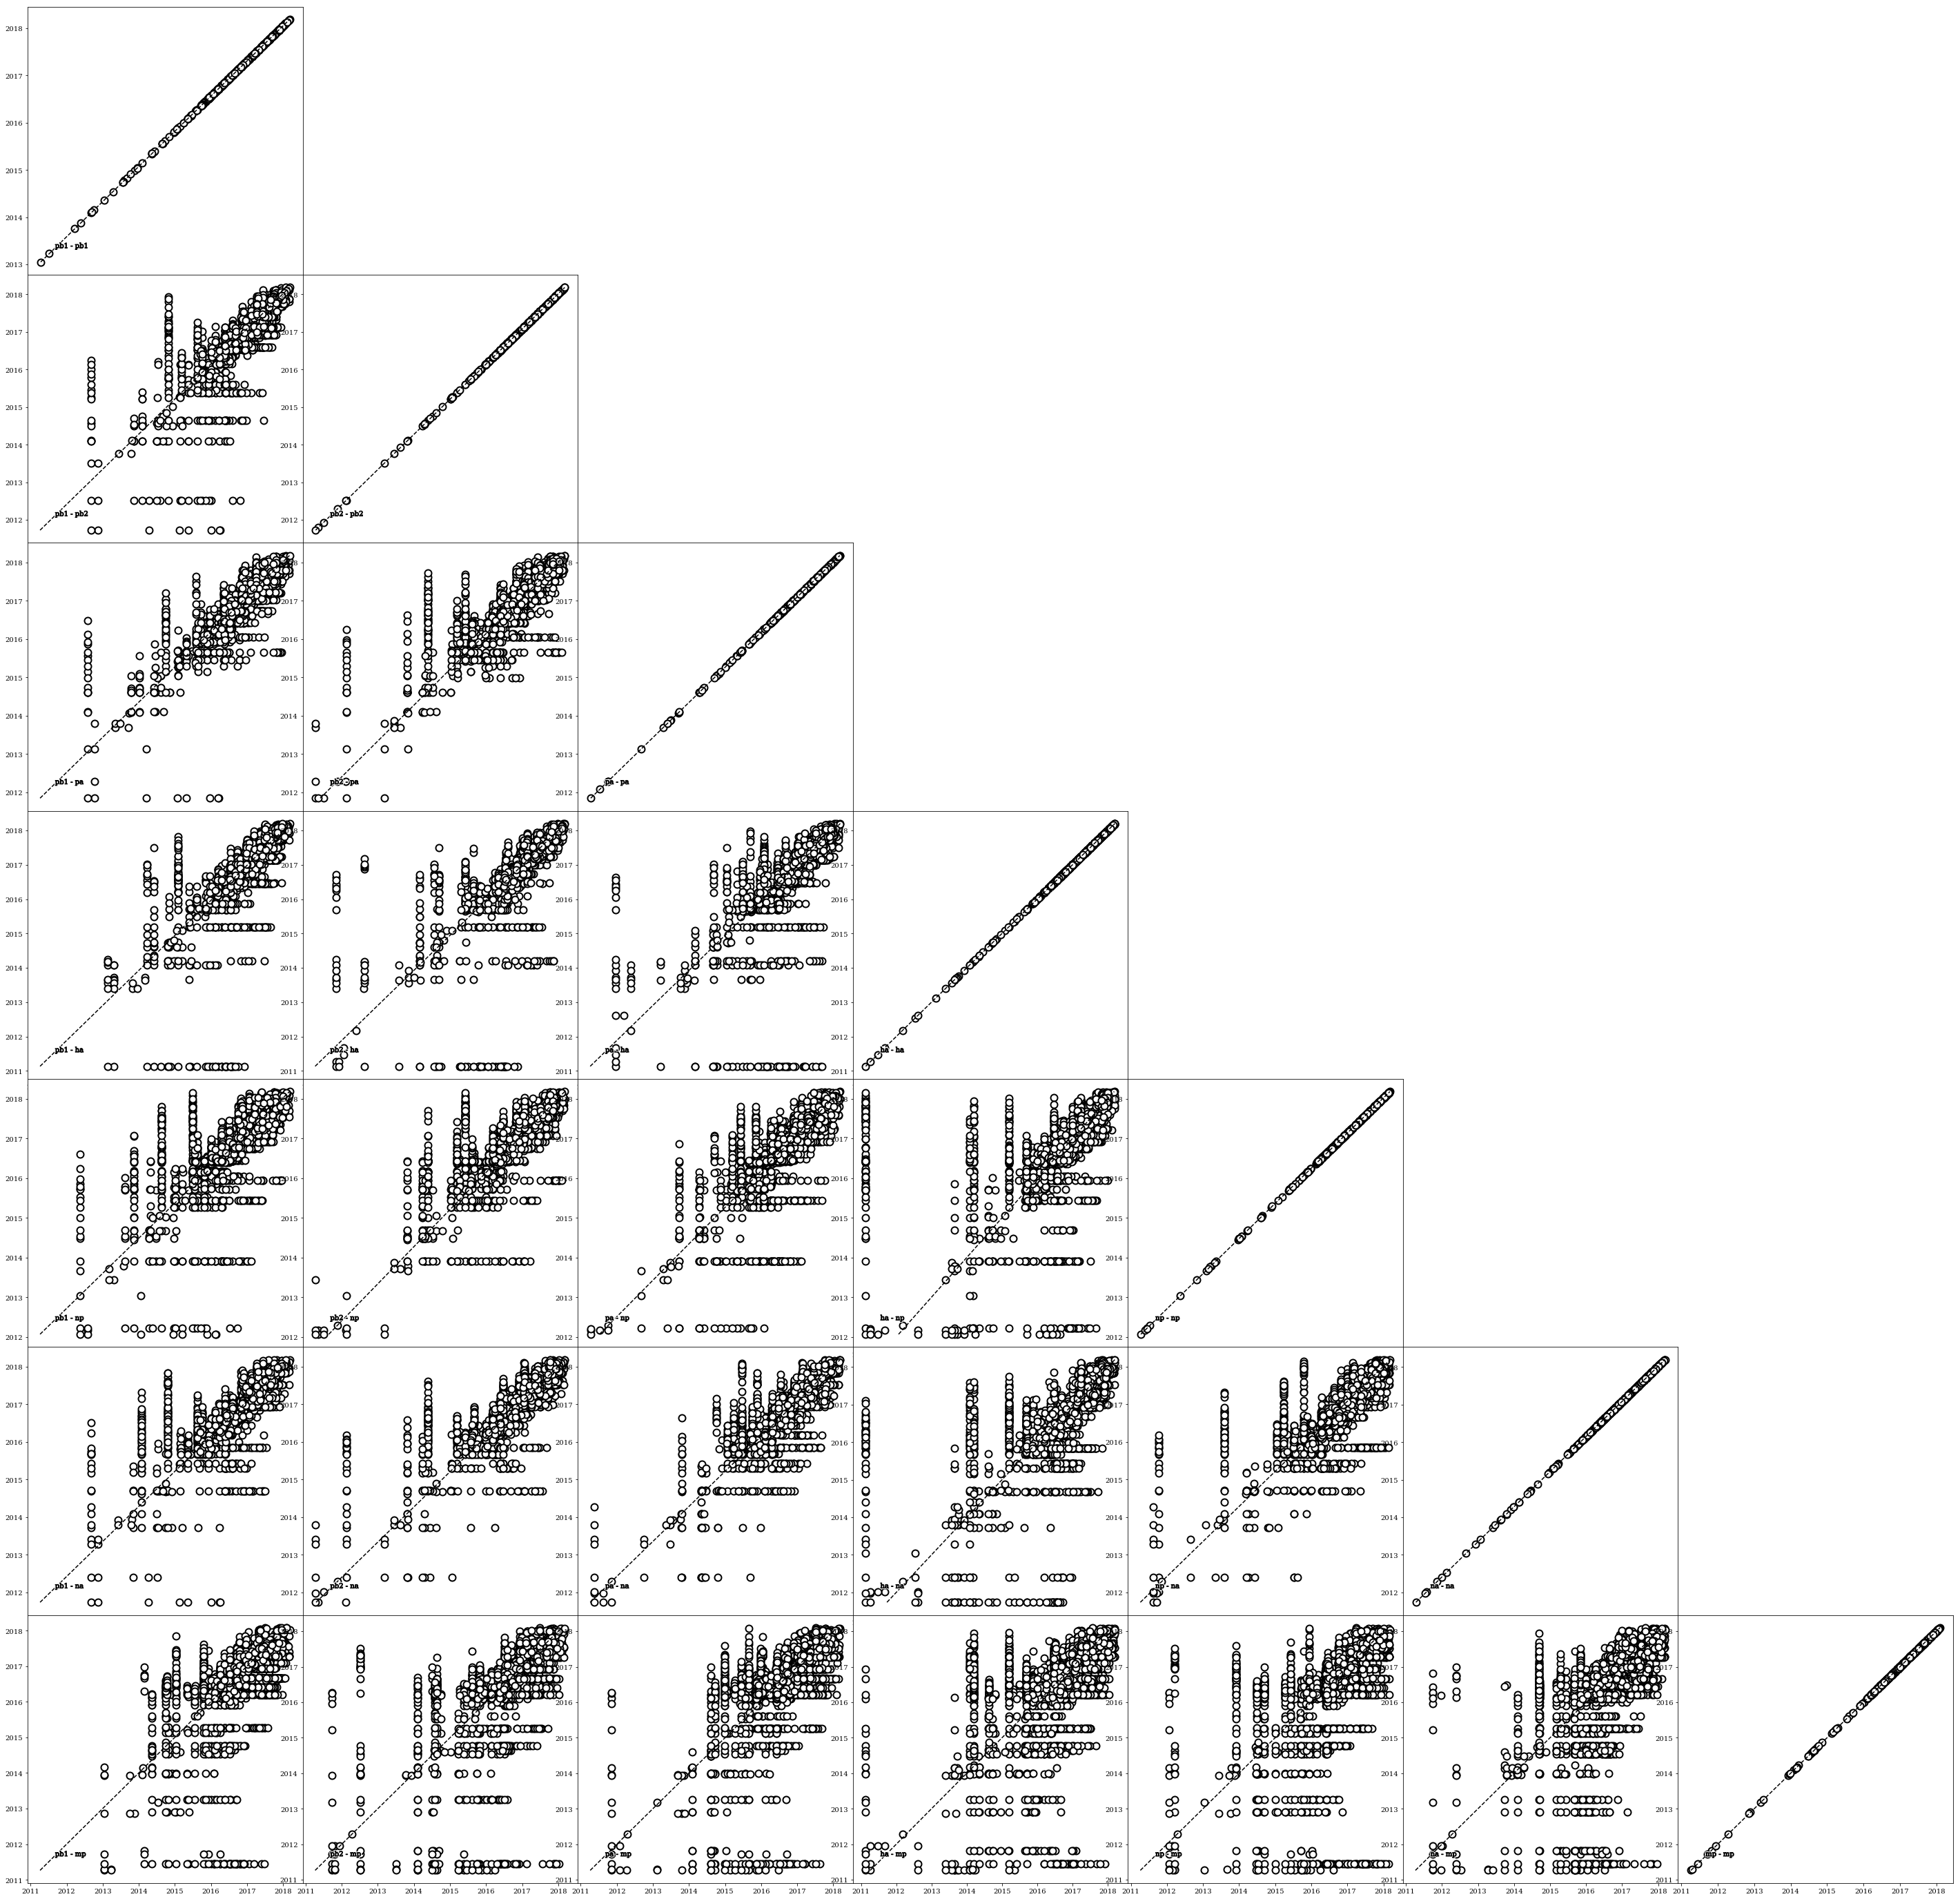

In [3]:
from matplotlib import gridspec
## define subplots
fig,ax = plt.subplots(figsize=(50,50),facecolor='w')
gs = gridspec.GridSpec(len(trees), len(trees),hspace=0.0,wspace=0.0)

segments=['pb1','pb2','pa','ha','np','na','mp']
for t1 in segments:
    for t2 in segments:
        ti1=segments.index(t1)
        ti2=segments.index(t2)
        
        if ti1<=ti2:
            
            ax=plt.subplot(gs[ti2,ti1])

            tr1=trees[t1]
            tr2=trees[t2]
            ax.text(0.1,0.1,'%s - %s'%(t1,t2),transform=ax.transAxes, path_effects=effects)
            left_tips=[w.name for w in tr1.Objects if w.branchType=='leaf']
            right_tips=[q.name for q in tr2.Objects if q.branchType=='leaf']
            tipNames=set(left_tips)&set(right_tips)
            tip_pairs=[(a,b) for a in tipNames for b in tipNames]
            
            xs=[tmrcas[t1][a][b] for a,b in tip_pairs]
            ys=[tmrcas[t2][a][b] for a,b in tip_pairs]
            print '%10s%10s%10s'%(segments[ti1],segments[ti2],len(set(zip(xs,ys))))
            uniques=set([(x,y) for x,y in zip(xs,ys)])
            ux,uy=zip(*uniques)
            ax.scatter(ux,uy,s=100,facecolor='w',edgecolor='k',lw=2)
            
            ax.plot(sorted(uy),sorted(uy),ls='--',color='k')
            
            if t2==0:
                ax.set_ylabel(t1)
            if t1==len(segments)-1:
                ax.set_xlabel(t2)

plt.show()

       pb1       pb2      -3.19028994503
pb1 pb2 0 A/NewZealand/2433/2016 True
pb1 pb2 0 A/SouthAustralia/135/2016-egg True
pb1 pb2 0 A/Newcastle/30/2016 True
pb1 pb2 1 A/NewZealand/2433/2016 True
pb1 pb2 1 A/SouthAustralia/135/2016-egg True
pb1 pb2 1 A/Newcastle/30/2016 True


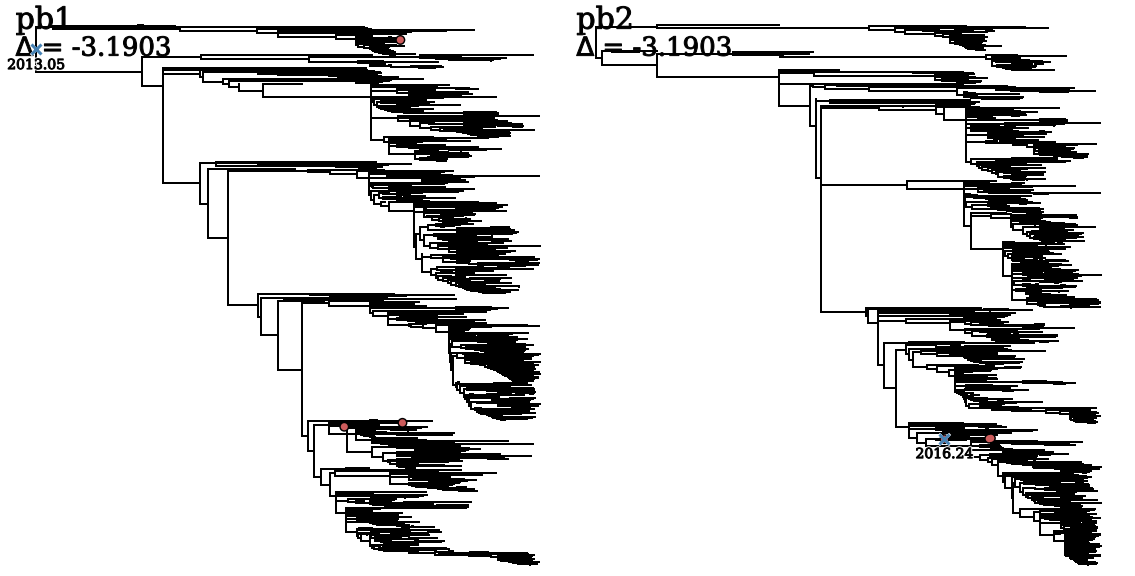

       pb1        pa      -3.42500362146
pb1 pa 0 A/NewZealand/2433/2016 True
pb1 pa 0 A/SouthAustralia/135/2016-egg True
pb1 pa 1 A/NewZealand/2433/2016 True
pb1 pa 1 A/SouthAustralia/135/2016-egg True


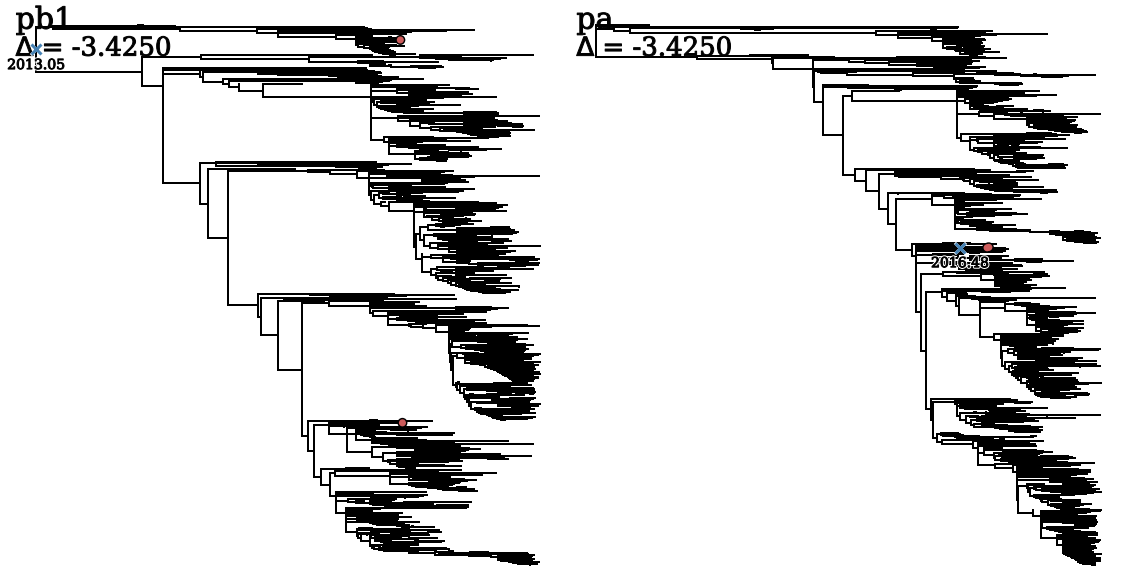

       pb1        ha      -3.14110831213
pb1 ha 0 A/Kazakhstan/22/2018 True
pb1 ha 0 A/Kazakhstan/171/2018 True
pb1 ha 0 A/Kazakhstan/24/2018 True
pb1 ha 0 A/Kazakhstan/128/2018 True
pb1 ha 0 A/Kazakhstan/88/2018 True
pb1 ha 0 A/Kazakhstan/106/2018 True
pb1 ha 0 A/Kazakhstan/129/2018 True
pb1 ha 0 A/Kazakhstan/146/2018 True
pb1 ha 0 A/HongKong/3555/2017 True
pb1 ha 0 A/HongKong/3596/2017 True
pb1 ha 1 A/HongKong/3555/2017 True
pb1 ha 1 A/HongKong/3596/2017 True
pb1 ha 1 A/Kazakhstan/88/2018 True
pb1 ha 1 A/Kazakhstan/146/2018 True
pb1 ha 1 A/Kazakhstan/129/2018 True
pb1 ha 1 A/Kazakhstan/106/2018 True
pb1 ha 1 A/Kazakhstan/24/2018 True
pb1 ha 1 A/Kazakhstan/22/2018 True
pb1 ha 1 A/Kazakhstan/171/2018 True
pb1 ha 1 A/Kazakhstan/128/2018 True


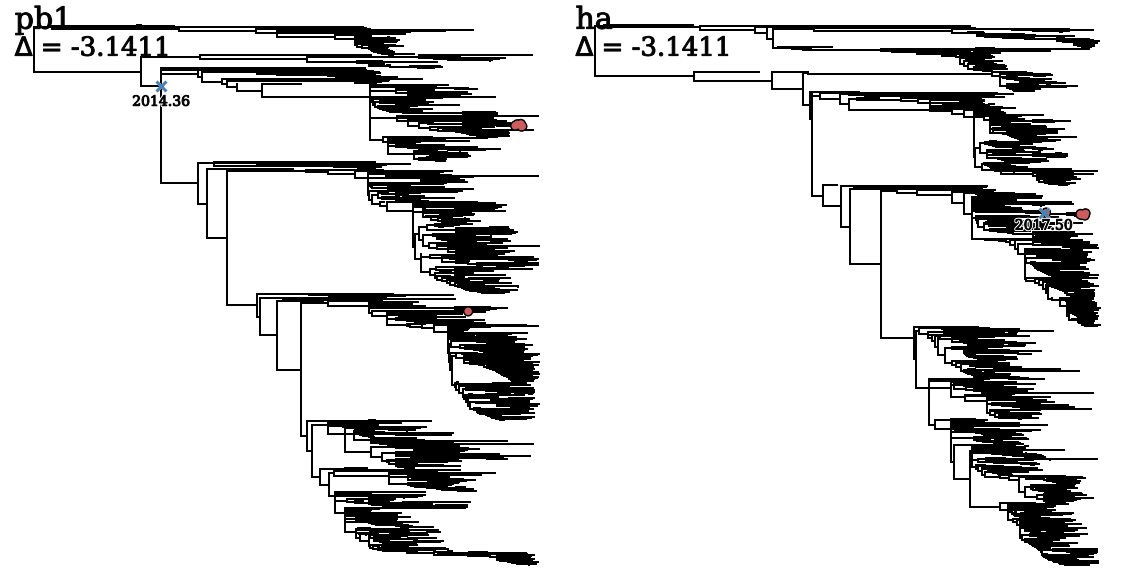

       pb1        np       -3.5538023566
pb1 np 0 A/NewZealand/2433/2016 True
pb1 np 0 A/SouthAustralia/135/2016-egg True
pb1 np 1 A/SouthAustralia/135/2016-egg True
pb1 np 1 A/NewZealand/2433/2016 True


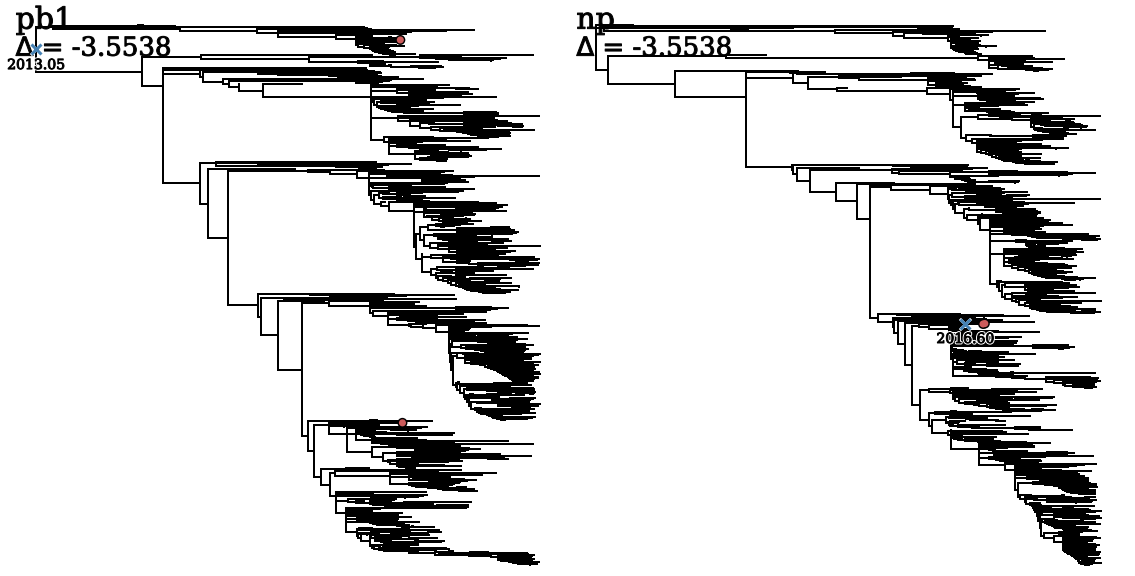

       pb1        na      -3.46741159721
pb1 na 0 A/NewZealand/2433/2016 True
pb1 na 0 A/SouthAustralia/135/2016-egg True
pb1 na 1 A/NewZealand/2433/2016 True
pb1 na 1 A/SouthAustralia/135/2016-egg True


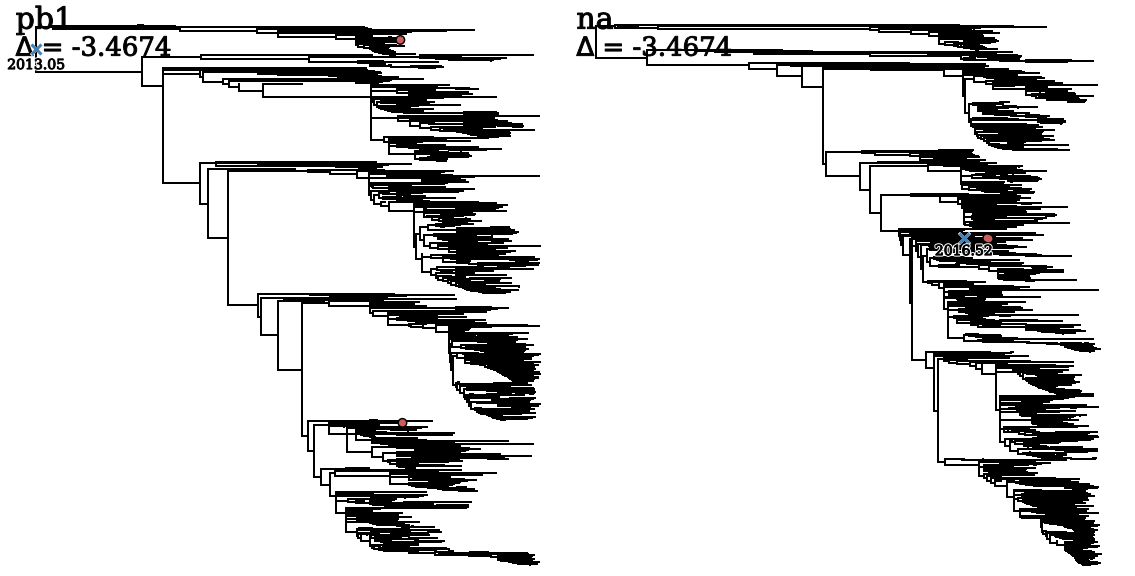

       pb1        mp       -2.8342693098
pb1 mp 0 A/WestVirginia/16/2017 True
pb1 mp 0 A/NewHampshire/19/2017 True
pb1 mp 0 A/Brazil/485/2017 True
pb1 mp 0 A/Georgia/17/2018 True
pb1 mp 0 A/Wisconsin/68/2018 True
pb1 mp 0 A/NewJersey/23/2018 True
pb1 mp 0 A/Maryland/11/2018 True
pb1 mp 0 A/Illinois/18/2018 True
pb1 mp 0 A/WestVirginia/10/2018 True
pb1 mp 0 A/Wisconsin/78/2018 True
pb1 mp 0 A/Delaware/20/2018 True
pb1 mp 0 A/Indiana/8/2018 True
pb1 mp 0 A/Minnesota/24/2018 True
pb1 mp 0 A/Illinois/13/2018 True
pb1 mp 0 A/Wisconsin/77/2018 True
pb1 mp 0 A/Kansas/14/2017 True
pb1 mp 0 A/Colorado/20/2018 True
pb1 mp 0 A/Indiana/17/2018 True
pb1 mp 0 A/Virginia/28/2018 True
pb1 mp 0 A/Delaware/17/2018 True
pb1 mp 0 A/Missouri/27/2018 True
pb1 mp 0 A/Massachusetts/18/2018 True
pb1 mp 0 A/NewHampshire/21/2018 True
pb1 mp 0 A/Arizona/17/2018 True
pb1 mp 1 A/WestVirginia/16/2017 True
pb1 mp 1 A/NewHampshire/19/2017 True
pb1 mp 1 A/Brazil/485/2017 True
pb1 mp 1 A/Arizona/17/2018 True
pb1 mp 1 A/

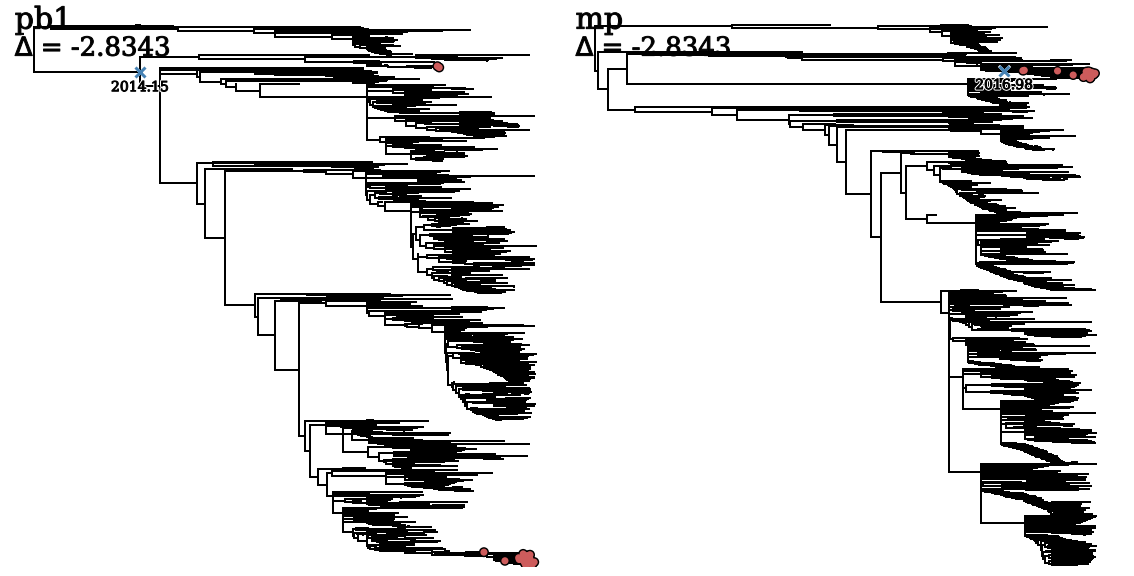

       pb2        pa      -3.73675275205
pb2 pa 0 A/Brisbane/29/2017-egg True
pb2 pa 0 A/AbuDhabi/24/2017 True
pb2 pa 0 A/Bermuda/361/2017 True
pb2 pa 0 A/Singapore/TT0279/2017 True
pb2 pa 0 A/Singapore/GP0133/2017 True
pb2 pa 0 A/Kanagawa/206/2017 True
pb2 pa 0 A/Kanagawa/ZC1616/2017 True
pb2 pa 0 A/Indonesia/Nihrd-Pal350/2017 True
pb2 pa 0 A/Indonesia/Nihrd-Sb17-3172/2017 True
pb2 pa 0 A/Indonesia/Nihrd-Bjm576/2017 True
pb2 pa 0 A/Kanagawa/IC1635/2017 True
pb2 pa 0 A/Singapore/KK0016/2017 True
pb2 pa 0 A/Yokohama/138/2017 True
pb2 pa 0 A/Singapore/GP0009/2017 True
pb2 pa 0 A/NewZealand/724/2017 True
pb2 pa 0 A/NewZealand/1419/2017 True
pb2 pa 0 A/NewZealand/703/2017 True
pb2 pa 0 A/Hawaii/44/2017-egg True
pb2 pa 0 A/NewZealand/669/2017 True
pb2 pa 0 A/NewZealand/883/2017 True
pb2 pa 0 A/NewZealand/722/2017 True
pb2 pa 0 A/Kanagawa/204/2017 True
pb2 pa 0 A/Yokohama/139/2017 True
pb2 pa 0 A/Singapore/TT0096/2017 True
pb2 pa 0 A/Bermuda/362/2017 True
pb2 pa 0 A/Niigata/509/2017 True
pb2

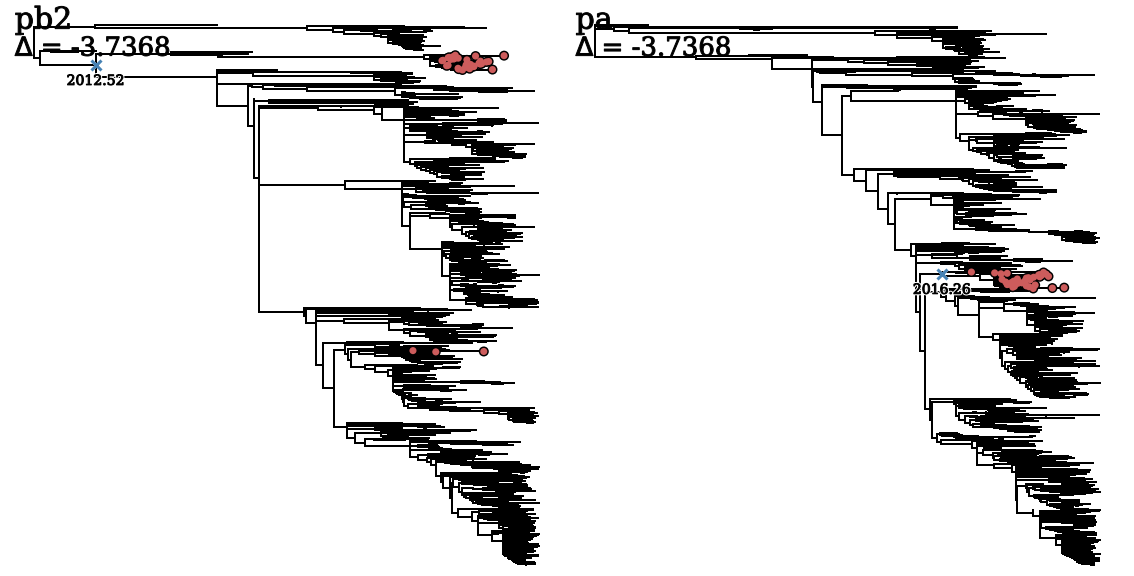

       pb2        ha      -4.98867072755
pb2 ha 0 A/NewZealand/1152/2016 True
pb2 ha 0 A/NewZealand/2433/2016 True
pb2 ha 1 A/NewZealand/2433/2016 True
pb2 ha 1 A/NewZealand/1152/2016 True


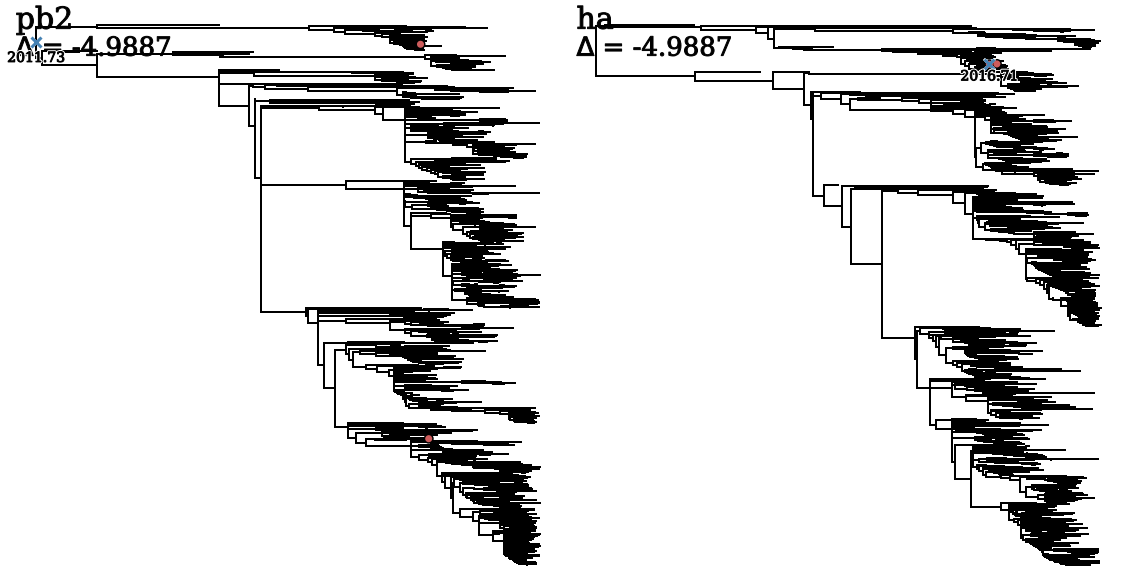

       pb2        np      -3.05458950279
pb2 np 0 A/Zhejiang-Nanhu/1745/2017 True
pb2 np 0 A/Chanthaburi/2445/2017 True
pb2 np 0 A/HongKong/4823/2017 True
pb2 np 1 A/Zhejiang-Nanhu/1745/2017 True
pb2 np 1 A/Chanthaburi/2445/2017 True
pb2 np 1 A/HongKong/4823/2017 True


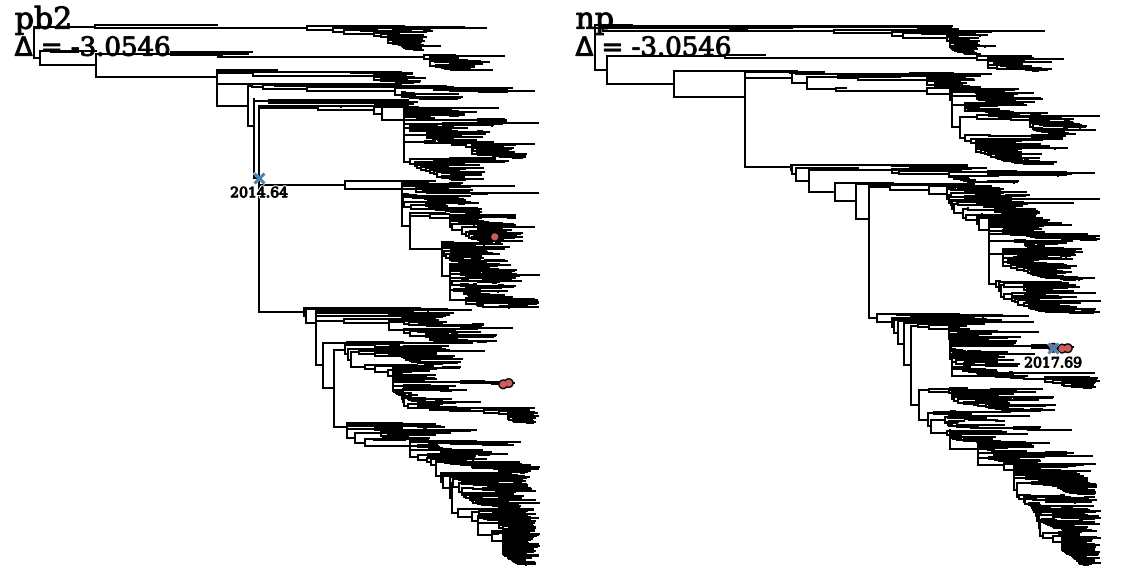

       pb2        na      -3.67158412388
pb2 na 0 A/Brisbane/29/2017-egg True
pb2 na 0 A/AbuDhabi/24/2017 True
pb2 na 0 A/Singapore/TT0279/2017 True
pb2 na 0 A/Singapore/GP0133/2017 True
pb2 na 0 A/Kanagawa/206/2017 True
pb2 na 0 A/Kanagawa/ZC1616/2017 True
pb2 na 0 A/Indonesia/Nihrd-Pal350/2017 True
pb2 na 0 A/Indonesia/Nihrd-Sb17-3172/2017 True
pb2 na 0 A/Indonesia/Nihrd-Bjm576/2017 True
pb2 na 0 A/Kanagawa/IC1635/2017 True
pb2 na 0 A/Singapore/KK0016/2017 True
pb2 na 0 A/Yokohama/138/2017 True
pb2 na 0 A/Singapore/GP0009/2017 True
pb2 na 0 A/NewZealand/724/2017 True
pb2 na 0 A/NewZealand/1419/2017 True
pb2 na 0 A/NewZealand/703/2017 True
pb2 na 0 A/NewZealand/1102/2017 True
pb2 na 0 A/Hawaii/44/2017-egg True
pb2 na 0 A/NewZealand/669/2017 True
pb2 na 0 A/NewZealand/883/2017 True
pb2 na 0 A/NewZealand/722/2017 True
pb2 na 0 A/Kanagawa/204/2017 True
pb2 na 0 A/Yokohama/139/2017 True
pb2 na 0 A/Singapore/TT0096/2017 True
pb2 na 0 A/Bermuda/362/2017 True
pb2 na 0 A/Niigata/509/2017 True

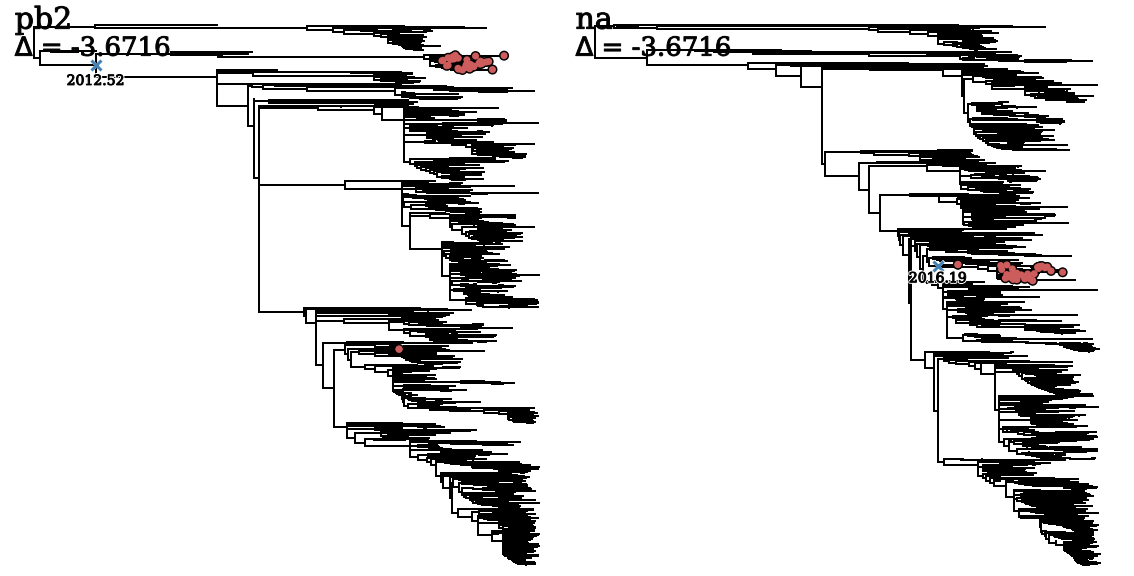

       pb2        mp      -4.98793419015
pb2 mp 0 A/NewZealand/724/2017 True
pb2 mp 0 A/Sapporo/45/2017 True
pb2 mp 1 A/Sapporo/45/2017 True
pb2 mp 1 A/NewZealand/724/2017 True


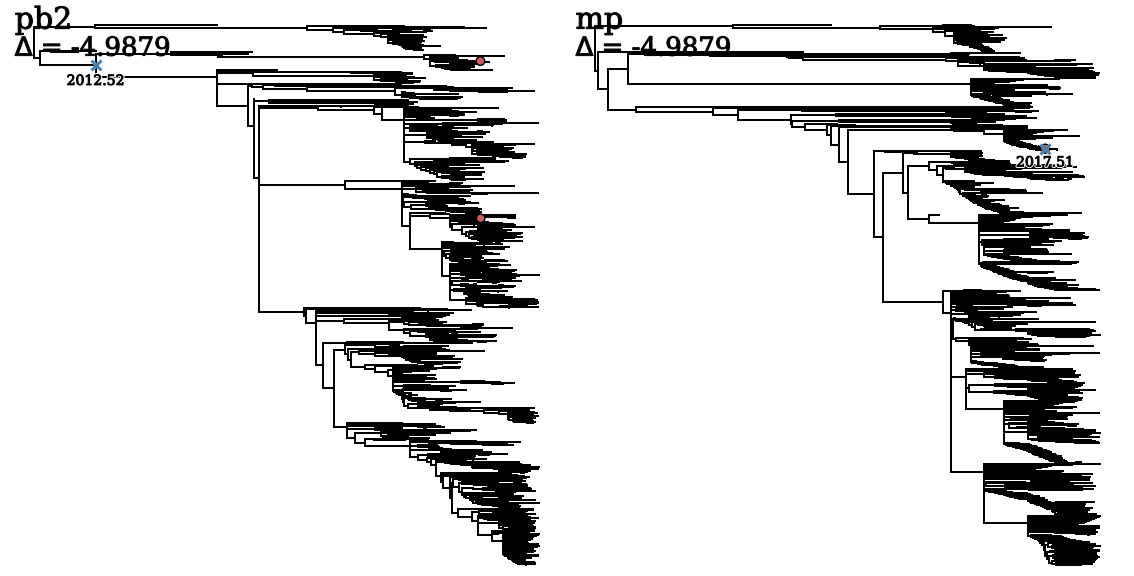

        pa        ha      -4.79666414976
pa ha 0 A/Hawaii/67/2016 True
pa ha 0 A/NewZealand/858/2016 True
pa ha 0 A/NewZealand/2433/2016 True
pa ha 1 A/Hawaii/67/2016 True
pa ha 1 A/NewZealand/858/2016 True
pa ha 1 A/NewZealand/2433/2016 True


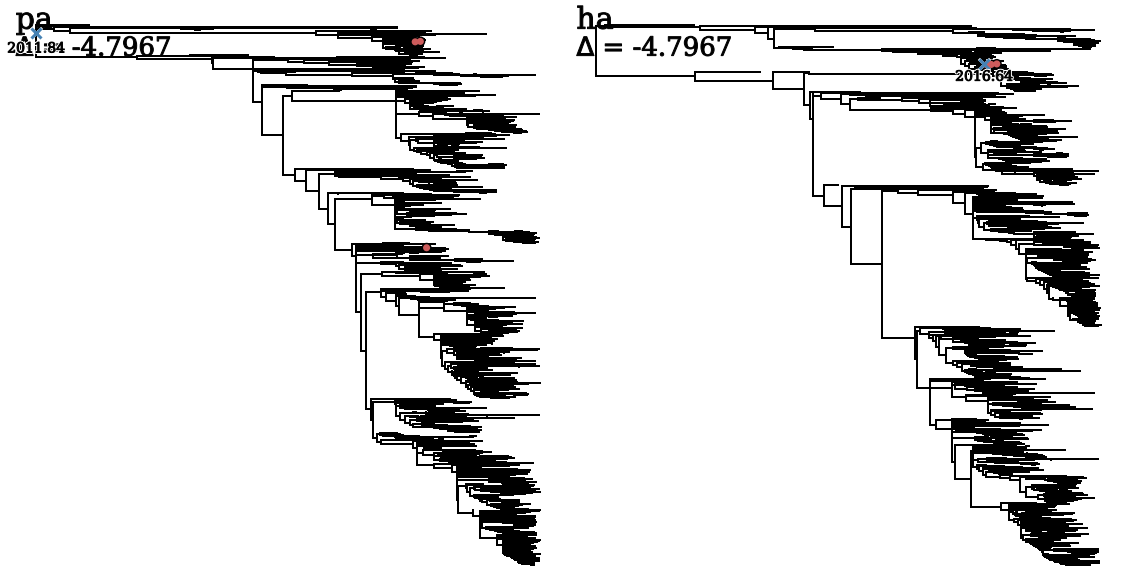

        pa        np      -2.76742355945
pa np 0 A/Uganda/215/2017 True
pa np 0 A/Kenya/115/2016 True
pa np 1 A/Kenya/115/2016 True
pa np 1 A/Uganda/215/2017 True


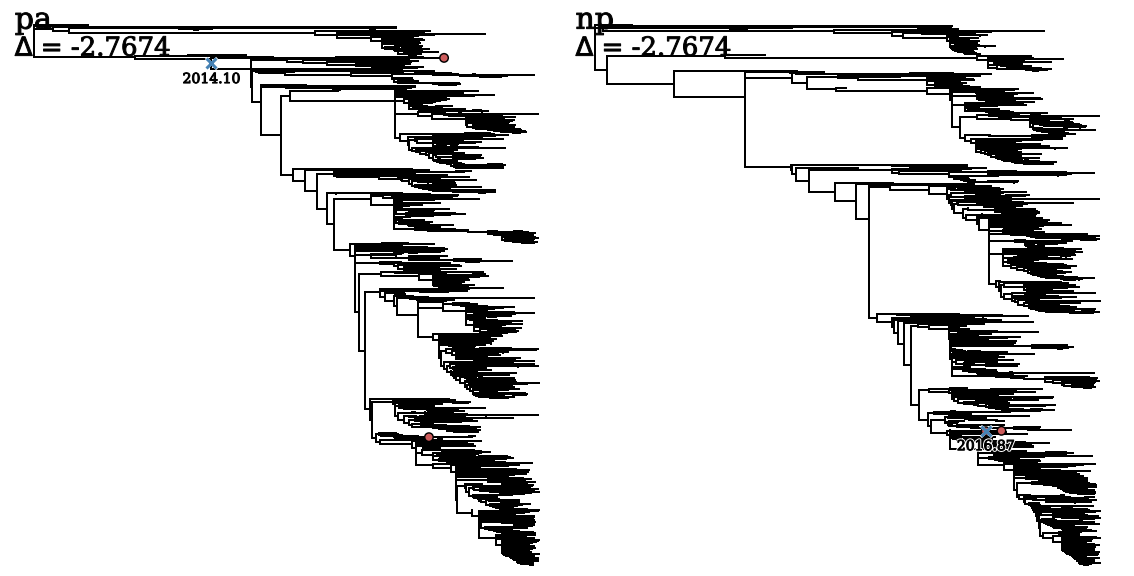

        pa        na      -2.54338017445
pa na 0 A/Uganda/215/2017 True
pa na 0 A/Kenya/115/2016 True
pa na 1 A/Kenya/115/2016 True
pa na 1 A/Uganda/215/2017 True


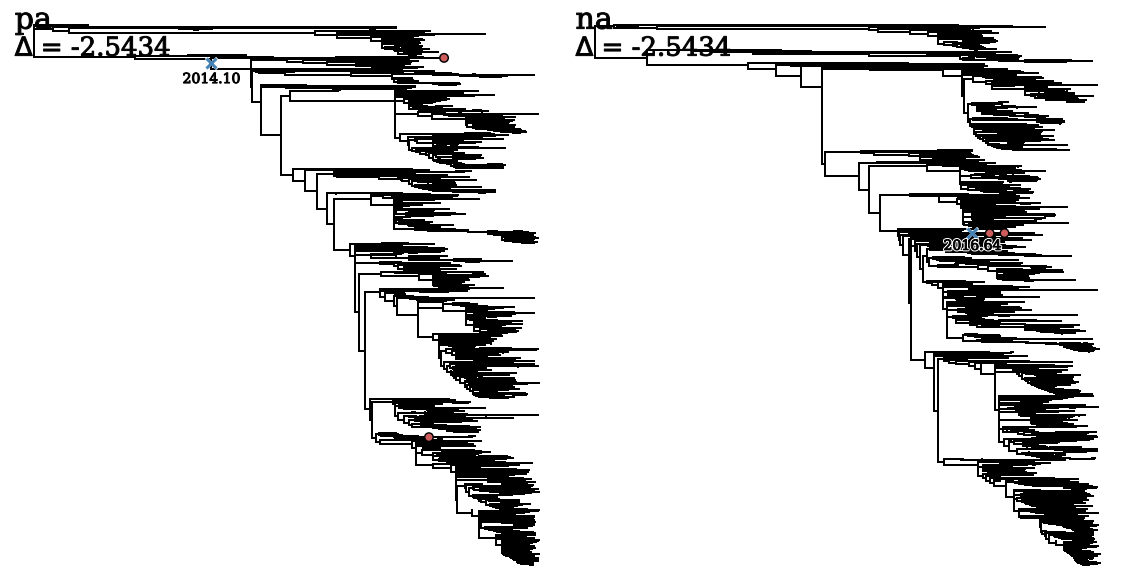

        pa        mp      -4.43596922264
pa mp 0 A/NewZealand/831/2016 True
pa mp 0 A/NewZealand/835/2016 True
pa mp 0 A/NewZealand/890/2016 True
pa mp 0 A/Sydney/142/2016 True
pa mp 0 A/NewZealand/2395/2016 True
pa mp 0 A/NewZealand/829/2016 True
pa mp 0 A/Hawaii/67/2016 True
pa mp 0 A/NewZealand/858/2016 True
pa mp 0 A/NewZealand/875/2016 True
pa mp 0 A/NewZealand/879/2016 True
pa mp 0 A/NewZealand/1154/2016 True
pa mp 0 A/NewZealand/889/2016 True
pa mp 0 A/NewZealand/2296/2016 True
pa mp 0 A/NewZealand/874/2016 True
pa mp 0 A/NewZealand/1118/2016 True
pa mp 0 A/NewZealand/577/2016 True
pa mp 0 A/NewZealand/678/2016 True
pa mp 0 A/NewZealand/2365/2016 True
pa mp 0 A/NewZealand/2336/2016 True
pa mp 0 A/NewZealand/1933/2016 True
pa mp 0 A/NewZealand/2343/2016 True
pa mp 0 A/NewZealand/2369/2016 True
pa mp 0 A/NewZealand/2433/2016 True
pa mp 1 A/NewZealand/2433/2016 True
pa mp 1 A/Sydney/142/2016 True
pa mp 1 A/NewZealand/879/2016 True
pa mp 1 A/NewZealand/874/2016 True
pa mp 1 A/NewZea

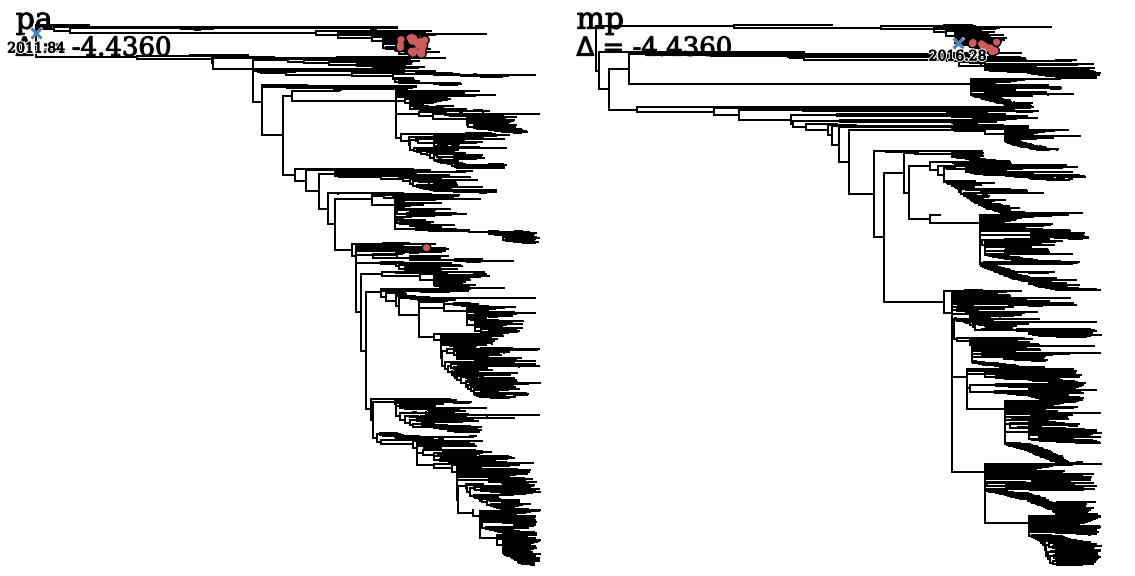

        ha        np      -7.01286716522
ha np 0 A/Indiana/17/2018 True
ha np 0 A/Pwllheli/5246/2018 True
ha np 1 A/Pwllheli/5246/2018 True
ha np 1 A/Indiana/17/2018 True


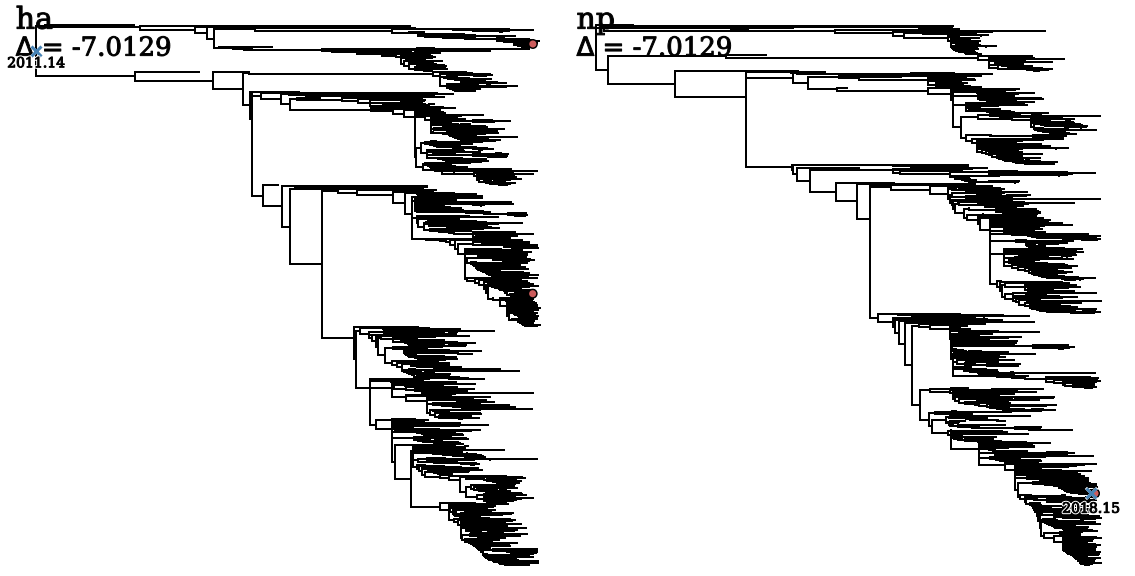

        ha        na      -5.96604382992
ha na 0 A/PuertoRico/13/2017 True
ha na 0 A/Maryland/39/2017 True
ha na 0 A/SantaCatarina/918/2017 True
ha na 0 A/Brazil/485/2017 True
ha na 0 A/Georgia/17/2018 True
ha na 0 A/Texas/63/2018 True
ha na 0 A/Texas/82/2018 True
ha na 0 A/Oklahoma/14/2018 True
ha na 0 A/Bridgend/9399/2018 True
ha na 0 A/Maryland/11/2018 True
ha na 0 A/DistrictOfColumbia/12/2018 True
ha na 0 A/Quebec/RV3265/2018 True
ha na 0 A/Kansas/14/2017 True
ha na 0 A/NewHampshire/21/2018 True
ha na 0 A/Delaware/17/2018 True
ha na 0 A/Massachusetts/18/2018 True
ha na 0 A/NewJersey/23/2018 True
ha na 0 A/Maryland/7/2018 True
ha na 0 A/WestVirginia/10/2018 True
ha na 0 A/Delaware/20/2018 True
ha na 0 A/Virginia/28/2018 True
ha na 0 A/Illinois/18/2018 True
ha na 0 A/Missouri/20/2018 True
ha na 0 A/Minnesota/24/2018 True
ha na 0 A/Illinois/13/2018 True
ha na 0 A/Indiana/17/2018 True
ha na 0 A/Washington/67/2018 True
ha na 0 A/Washington/57/2018 True
ha na 0 A/Wisconsin/78/2018 True
h

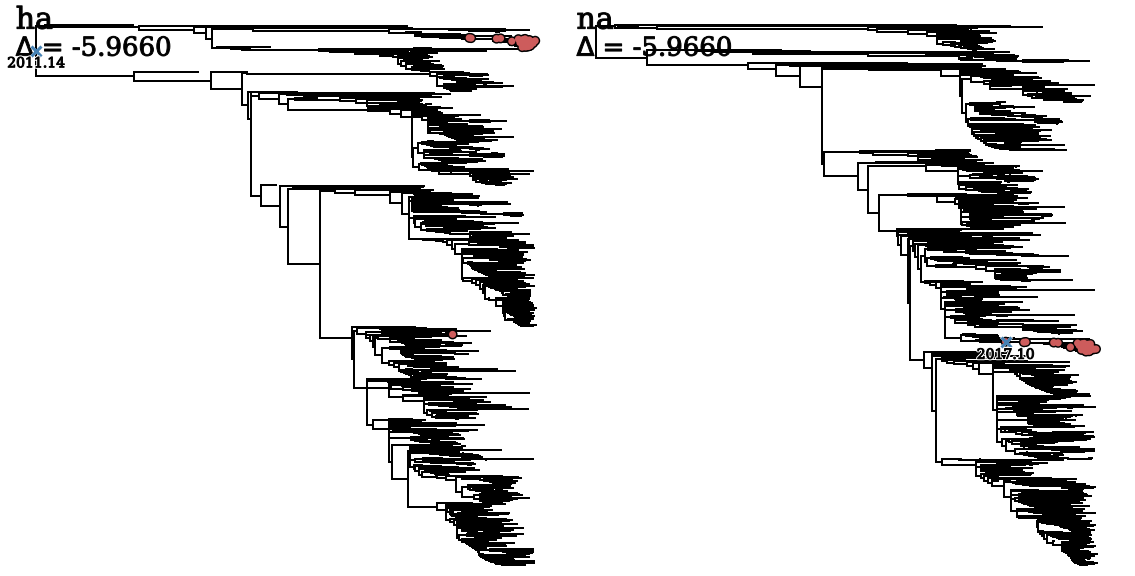

        ha        mp      -5.79579558112
ha mp 0 A/DistrictOfColumbia/12/2018 True
ha mp 0 A/England/72480621/2017 True
ha mp 0 A/Brisbane/1001/2017 True
ha mp 1 A/England/72480621/2017 True
ha mp 1 A/DistrictOfColumbia/12/2018 True
ha mp 1 A/Brisbane/1001/2017 True


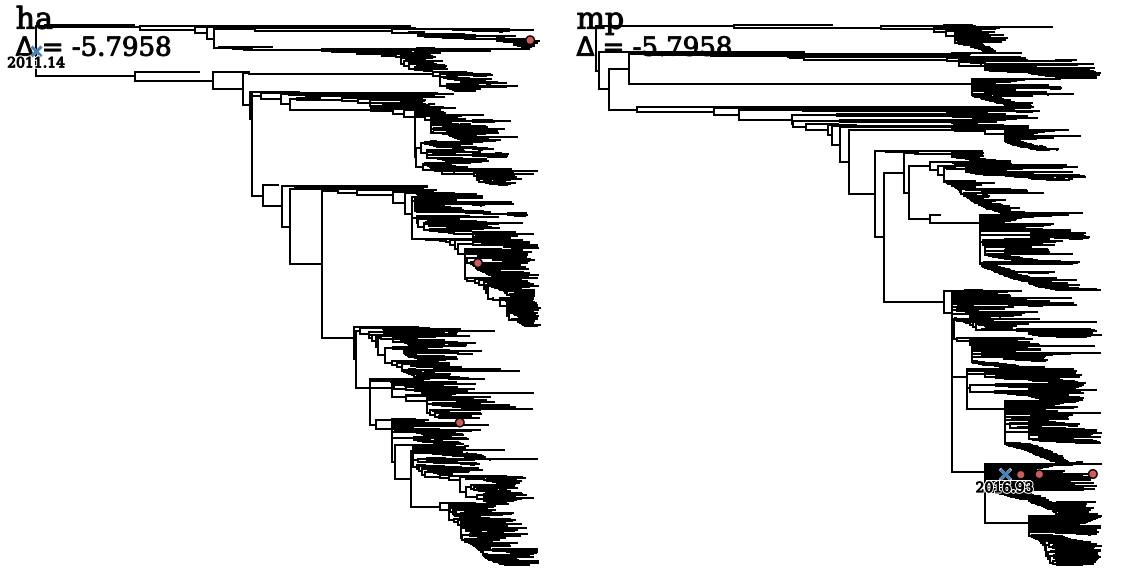

        np        na      -3.97704176174
np na 0 A/Fukuoka-C/17/2017 True
np na 0 A/Singapore/GP0133/2017 True
np na 0 A/Nagano/2298/2017 True
np na 0 A/Brisbane/29/2017-egg True
np na 0 A/Kanagawa/204/2017 True
np na 0 A/Yokohama/139/2017 True
np na 0 A/Kanagawa/ZC1616/2017 True
np na 0 A/Kanagawa/206/2017 True
np na 0 A/Singapore/TT0279/2017 True
np na 0 A/AbuDhabi/24/2017 True
np na 0 A/Indonesia/Nihrd-Mlg455/2017 True
np na 0 A/Yokohama/138/2017 True
np na 0 A/Singapore/TT0096/2017 True
np na 0 A/Kanagawa/IC1635/2017 True
np na 0 A/Singapore/KK0016/2017 True
np na 0 A/Indonesia/Nihrd-Sb17-3172/2017 True
np na 0 A/Indonesia/Nihrd-Pal350/2017 True
np na 0 A/Vaxjo/1/2017 True
np na 0 A/Indonesia/Nihrd-Bjm576/2017 True
np na 0 A/Bermuda/362/2017 True
np na 0 A/Yamagata/122/2017 True
np na 0 A/Kagawa/238/2017 True
np na 0 A/Kagawa/191/2017 True
np na 0 A/Honduras/188/2017 True
np na 0 A/Niigata/509/2017 True
np na 0 A/Honduras/195/2017 True
np na 0 A/Tokyo/17109/2017 True
np na 0 A/Sing

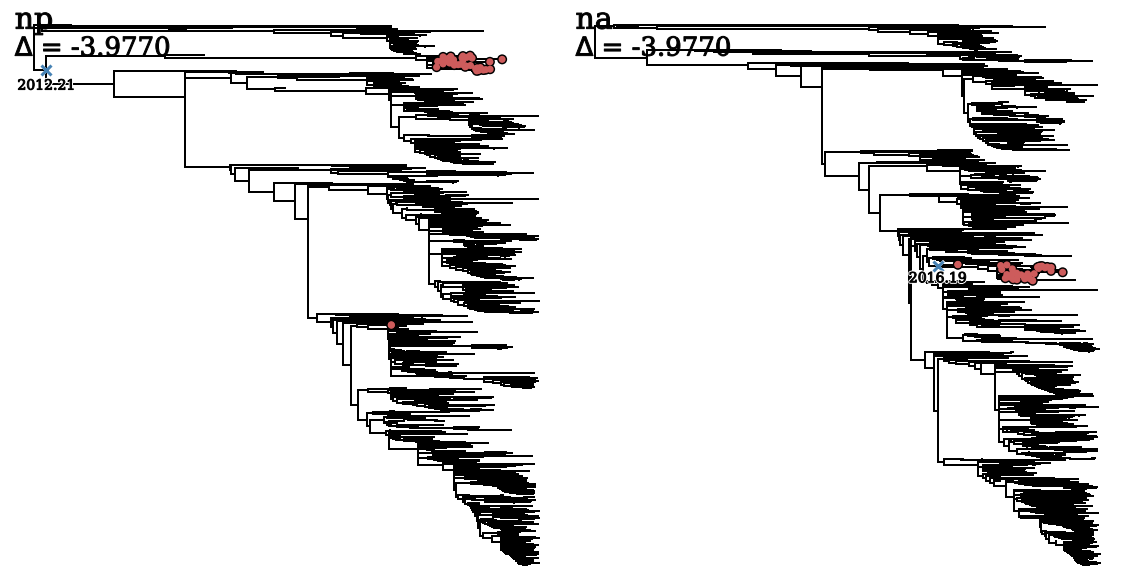

        np        mp      -5.29339182801
np mp 0 A/NewZealand/724/2017 True
np mp 0 A/Sapporo/45/2017 True
np mp 1 A/Sapporo/45/2017 True
np mp 1 A/NewZealand/724/2017 True


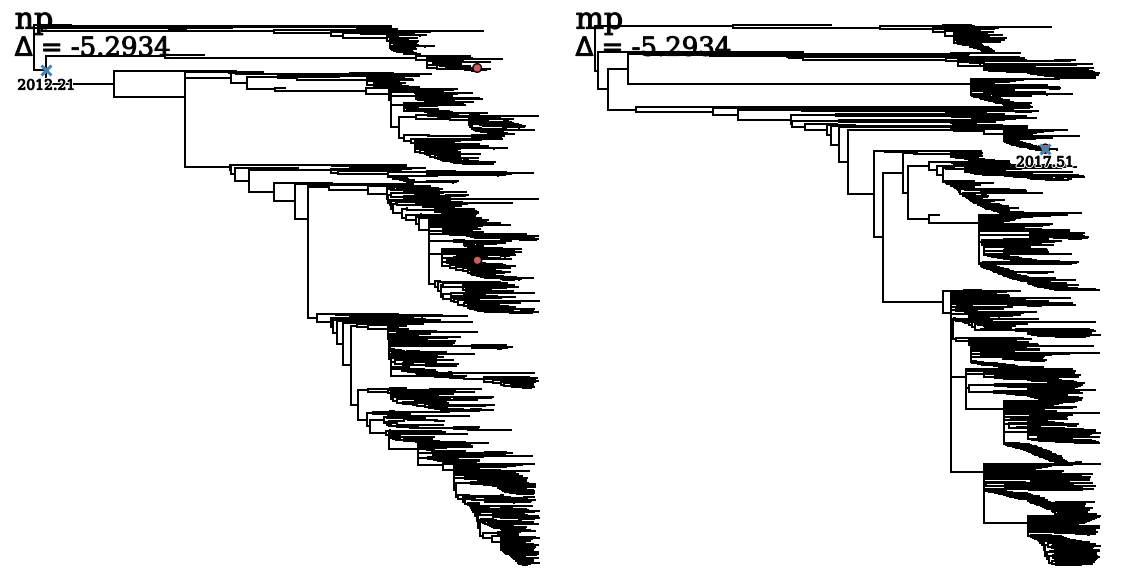

        na        mp      -5.08419922872
na mp 0 A/SouthAustralia/150/2016 True
na mp 0 A/NewZealand/2433/2016 True
na mp 1 A/SouthAustralia/150/2016 True
na mp 1 A/NewZealand/2433/2016 True


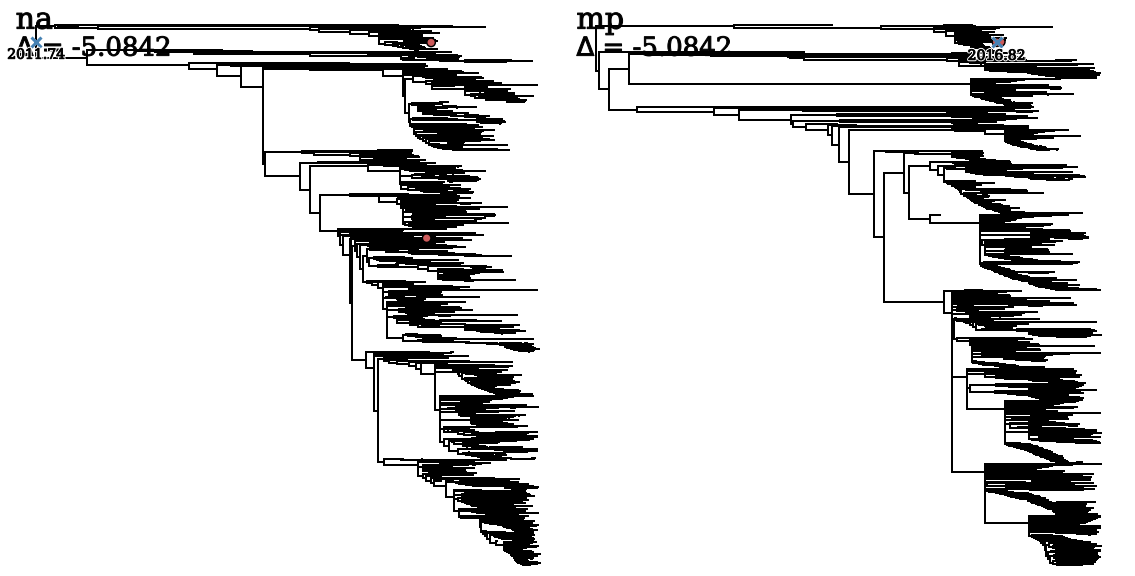

In [9]:
from matplotlib import gridspec

segments=['pb1','pb2','pa','ha','np','na','mp']
for t1 in segments:
    for t2 in segments:
        ti1=segments.index(t1)
        ti2=segments.index(t2)
        
        if ti1<ti2:
            tr1=trees[t1]
            tr2=trees[t2]
            left_tips=[w.name for w in tr1.Objects if w.branchType=='leaf']
            right_tips=[q.name for q in tr2.Objects if q.branchType=='leaf']
            tipNames=set(left_tips)&set(right_tips)
            
            tip_pairs=[(a,b) for a in tipNames for b in tipNames]
            
            xs=[tmrcas[t1][a][b] for a,b in tip_pairs]
            ys=[tmrcas[t2][a][b] for a,b in tip_pairs]
            
            
#             focus=np.random.choice([x-y for x,y in zip(xs,ys) if x!=None and y!=None],size=1) ## pick random deviation
            focus=min([x-y for x,y in zip(xs,ys) if x!=None and y!=None]) ## pick the smallest deviation
            
                
            matches1=[a for a,b in tip_pairs if tmrcas[t1][a][b]!=None and tmrcas[t2][a][b]!=None and tmrcas[t1][a][b]-tmrcas[t2][a][b]==focus]
            matches2=[b for a,b in tip_pairs if tmrcas[t1][a][b]!=None and tmrcas[t2][a][b]!=None and tmrcas[t1][a][b]-tmrcas[t2][a][b]==focus]
            
            matches=set(matches1+matches2)
            
            print '%10s%10s%20s'%(t1,t2,focus)
            
            fig = plt.figure(figsize=(20, 10)) 
            gs = gridspec.GridSpec(1, 2,wspace=0.01) ## setup figure
            
            for l,ll in enumerate([trees[t1],trees[t2]]):
                ax = plt.subplot(gs[l])
                
                ax.text(0.01,0.99,[t1,t2][l],size=30,transform=ax.transAxes, path_effects=effects)
                ax.text(0.01,0.94,'$\Delta$ = %.4f'%(focus),size=26,transform=ax.transAxes, path_effects=effects)
                branchWidth=2
                tipSize=50 ## tip circle radius
                
                tmrca=ll.commonAncestor(matches,numName=True)
                ax.scatter(tmrca.absoluteTime,tmrca.y,s=125,marker='x',lw=3,color='white',zorder=100)
                ax.scatter(tmrca.absoluteTime,tmrca.y,s=100,marker='x',lw=3,color='steelblue',zorder=101)
                ax.text(tmrca.absoluteTime,tmrca.y-20,'%.2f'%(tmrca.absoluteTime),size=14,va='top',ha='center',zorder=101, path_effects=effects)
                
                for k in ll.Objects: ## iterate over branches in the tree
                    c='k'
                    y=k.y ## get y coordinates
                    yp=k.parent.y ## get parent's y coordinate

                    x=k.absoluteTime ## x coordinate
                    xp=k.parent.absoluteTime ## get parent's x

                    if k.branchType=='leaf':
                        if k.numName in matches:
                            c='indianred'
                            print t1,t2,l,k.numName,k.numName in matches
                        
                            ax.scatter(x,y,s=tipSize,facecolor=c,edgecolor='none',zorder=100)
                            ax.scatter(x,y,s=tipSize*2,facecolor='k',edgecolor='none',zorder=99)
#                         ax.text(x+0.2,y,k.numName,ha='left',va='center',size=16, path_effects=effects)
                    elif isinstance(k,bt.node): ## if node...
                        yl=k.children[0].y ## get y coordinates of first and last child
                        yr=k.children[-1].y
                        ls='-'
                        ax.plot([x,x],[yl,yr],color='k',lw=branchWidth,ls=ls,zorder=98) ## plot vertical bar connecting node to both its offspring

                    ax.plot([x,xp],[y,y],color='k',lw=branchWidth,zorder=98) ## plot horizontal branch to parent

                ax.xaxis.tick_bottom() ## tick bottom
                ax.yaxis.tick_left() ## tick left

                ax.spines['top'].set_visible(False) ## make axes invisible
                ax.spines['right'].set_visible(False)
                ax.spines['left'].set_visible(False)
                ax.spines['bottom'].set_visible(False)

                ax.tick_params(axis='x',labelsize=20,size=0) ## no axis labels visible except for timeline
                ax.tick_params(axis='y',size=0)
                ax.set_yticklabels([])
                ax.set_xticklabels([])
                ax.set_ylim(-4,ll.ySpan+5)

            plt.show()
            
#             ax=plt.subplot(gs[ti2,ti1])

#             tr1=trees[t1]
#             tr2=trees[t2]
#             #print tr1.treeHeight,tr2.treeHeight

#             ax.text(0.1,0.1,'%s - %s'%(t1,t2),transform=ax.transAxes, path_effects=effects)
#             #fig,ax = plt.subplots(figsize=(10,10),facecolor='w')

            
#             print '%10s%10s%10s'%(segments[ti1],segments[ti2],len(set(zip(xs,ys))))
#             #ax.invert_xaxis()
#             ax.scatter(xs,ys,s=100,facecolor='w',edgecolor='k',lw=2)

#             ax.plot(sorted(xs),sorted(xs),ls='--',color='k')
            
#             if t2==0:
#                 ax.set_ylabel(t1)
#             if t1==len(segments)-1:
#                 ax.set_xlabel(t2)
            
# plt.show()